In [22]:
import requests, zipfile, StringIO
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import pickle
from copy import deepcopy
import seaborn as sns
# Plotting Options
sns.set_style("whitegrid")
sns.despine()

In [23]:
def read_csv_zip(filename):
    z = zipfile.ZipFile(filename+'.zip')
    df = pd.read_csv(z.open(filename))
    return df
train = read_csv_zip("train.csv")
test = read_csv_zip("test.csv")

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [5]:
test.describe()

,Id,X,Y
count,884262.000000,884262.000000,884262.000000
mean,442130.500000,-122.422693,37.771476
std,255264.596206,0.030985,0.484824
min,0.000000,-122.513642,37.707879
25%,221065.250000,-122.433069,37.752374
50%,442130.500000,-122.416517,37.775421
75%,663195.750000,-122.406959,37.784353
max,884261.000000,-120.500000,90.000000


In [24]:
train['X']=train['X'].apply(lambda x: -122.4313 if x>-122.3 else x)
test['X']=test['X'].apply(lambda x: -122.4313 if x>-122.3 else x)
train['Y']=train['Y'].apply(lambda x: 37.7799 if x>38 else x)
test['Y']=test['Y'].apply(lambda x: 37.7799 if x>38 else x)

In [7]:
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422764,37.767036
std,0.025284,0.024164
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416422,37.775421
75%,-122.406959,37.784368
max,-122.364937,37.819975


In [8]:
test.describe()

,Id,X,Y
count,884262.000000,884262.000000,884262.000000
mean,442130.500000,-122.422859,37.766988
std,255264.596206,0.025344,0.024179
min,0.000000,-122.513642,37.707879
25%,221065.250000,-122.433069,37.752374
50%,442130.500000,-122.416517,37.775421
75%,663195.750000,-122.406959,37.784353
max,884261.000000,-122.364751,37.820621


In [18]:
#train["Address"].value_counts()[:20].plot(kind="bar")

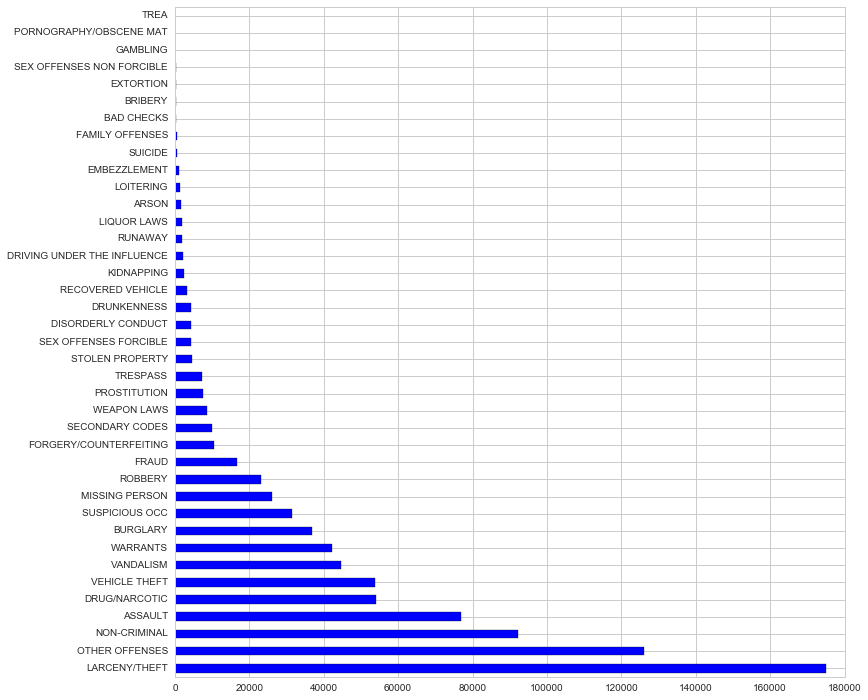

In [10]:
width = 12
height = 12
plt.figure(figsize=(width, height))
train["Category"].value_counts().plot(kind="barh")

In [11]:
# train["Category"].value_counts()

In [12]:
train["Resolution"].value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [13]:
top_10_crime = list(train["Category"].value_counts()[:10].index)

In [14]:
# top_10_crime

In [15]:
def plot_bar(df, title,ylabel):
    """
    Helper function for plotting barplots.
    Color selection is made at random from a tuple of seabonrn colorsets
    """
    """
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    """
    color = sns.color_palette('hls', df.shape[1])
    fig = plt.figure(figsize=(15,15))
    
    bar   = df.plot(kind='barh',
                    title=title,
                    fontsize=16,
                    figsize=(12,8),
                    stacked=True,
                    width=1,
                    color=color,
    )
    plt.title(title,fontsize=20)
    
    plt.ylabel(ylabel,fontsize=20)
    # bar.figure.savefig(filename)

    plt.show()

In [16]:
address_category = train.loc[train["Category"].isin(top_10_crime)].groupby(['Address','Category']).size().unstack()

In [17]:
address_category_index = address_category.sum(1).argsort()
add_cat_count = address_category.take(address_category_index)[-20:]


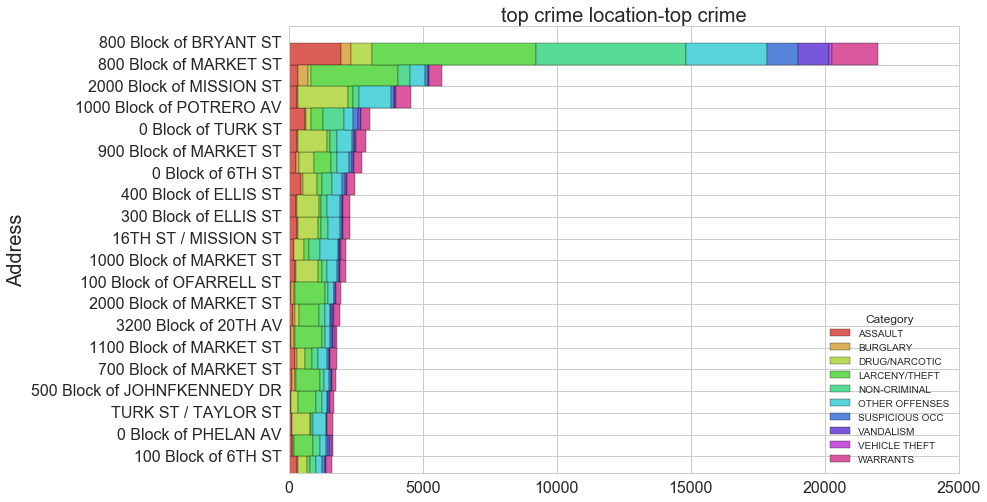

In [19]:
plot_bar(add_cat_count,'top crime location-top crime','Address')

In [20]:
add_cat_count_perc = add_cat_count.div(add_cat_count.sum(1).astype(float),axis=0)

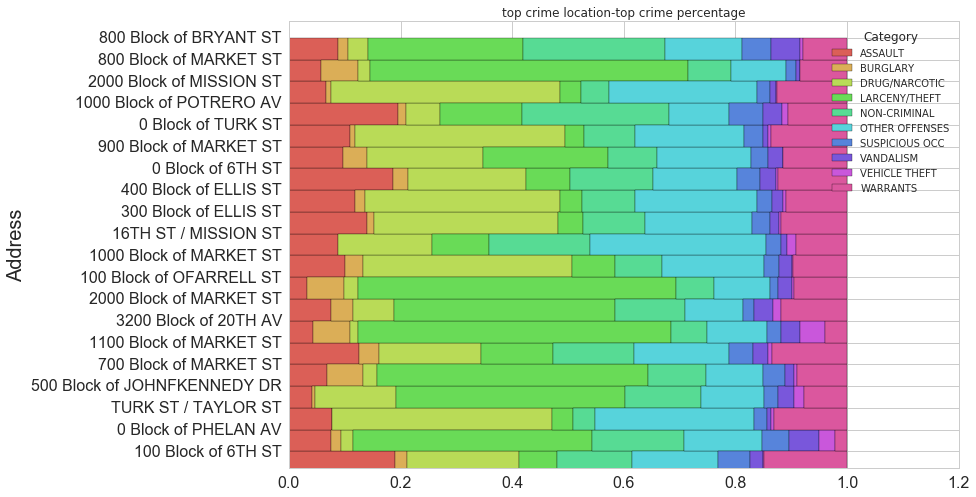

In [78]:
plot_bar(add_cat_count_perc,'top crime location-top crime percentage','Address')

In [21]:
# train["PdDistrict"].value_counts()

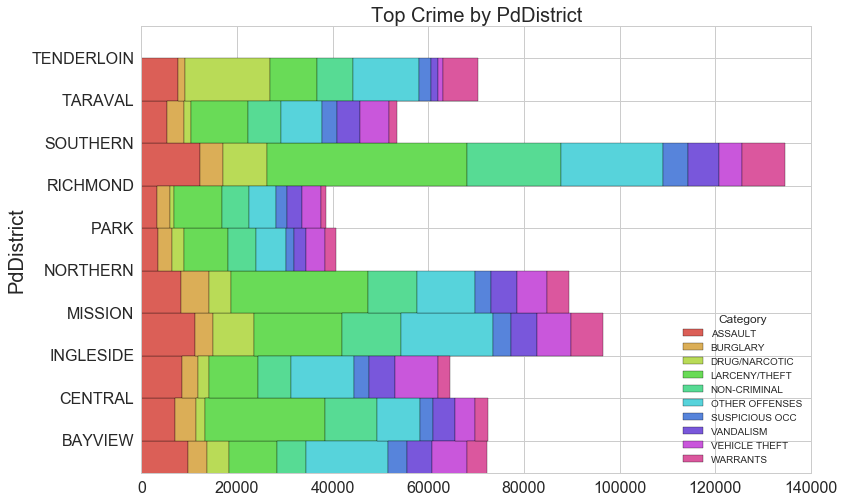

In [22]:
pd_category = train.loc[train["Category"].isin(top_10_crime)].groupby(['PdDistrict','Category']).size().unstack()
plot_bar(pd_category,"Top Crime by PdDistrict","PdDistrict")

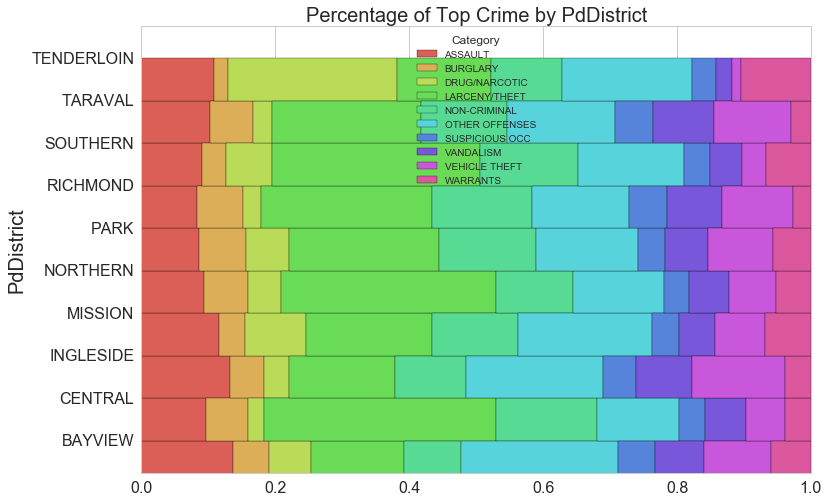

In [23]:
pd_category_percent = pd_category.div(pd_category.sum(1).astype(float),axis=0)
plot_bar(pd_category_percent,"Percentage of Top Crime by PdDistrict","PdDistrict")

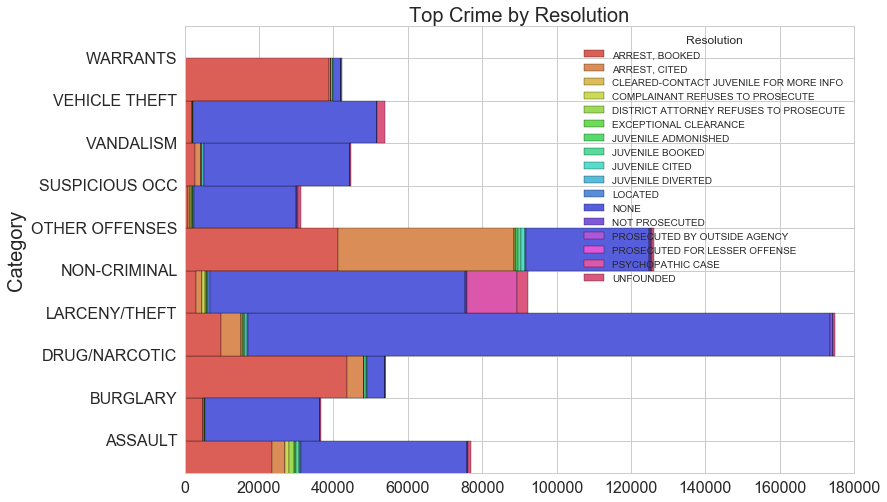

In [24]:
category_resolution = train.loc[train["Category"].isin(top_10_crime)].groupby(['Category','Resolution']).size().unstack()
plot_bar(category_resolution,"Top Crime by Resolution","Category")

In [25]:
def DateTimeFeature(df,dateColumn):
    df["DateIndex"] = pd.to_datetime(df[dateColumn])
    df["Year"] = df["DateIndex"].apply(lambda x: x.year)
    df["Month"] = df["DateIndex"].apply(lambda x: x.month)
    df["WeekDay"] = df["DateIndex"].apply(lambda x: x.weekday())
    df["Hour"] = df["DateIndex"].apply(lambda x: x.hour)   



In [26]:
DateTimeFeature(train,"Dates")

In [27]:
DateTimeFeature(test,"Dates")

In [28]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DateIndex,Year,Month,WeekDay,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,2015,5,2,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,2015,5,2,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,2015,5,2,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00,2015,5,2,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00,2015,5,2,23


top 10 crime 
'LARCENY/THEFT',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'ASSAULT',
 'DRUG/NARCOTIC',
 'VEHICLE THEFT',
 'VANDALISM',
 'WARRANTS',
 'BURGLARY',
 'SUSPICIOUS OCC'

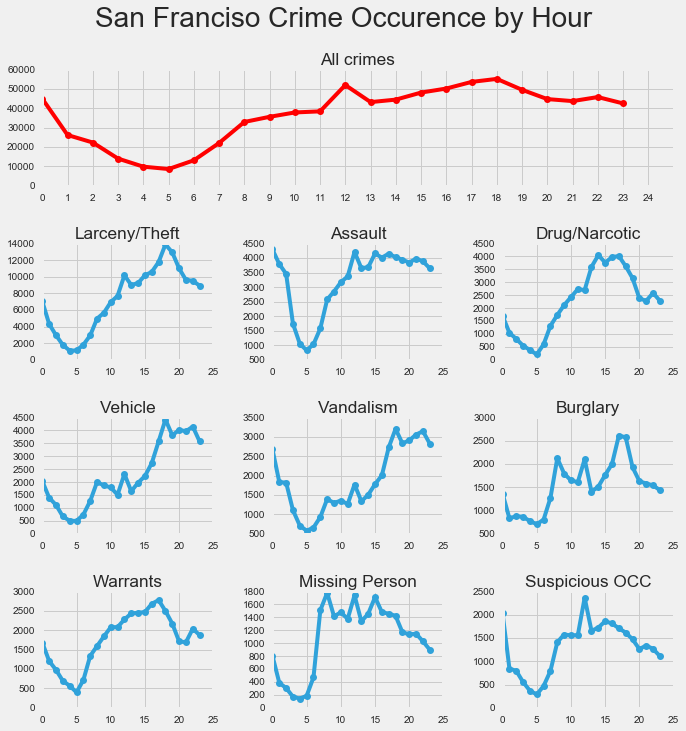

In [29]:
import pylab

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((4,3), (0,0), colspan=3)
    ax1.plot(train.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((4,3), (1, 0))
    ax2.plot(train.loc[train["Category"]=='LARCENY/THEFT'].groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((4,3), (1, 1))
    ax3.plot(train.loc[train["Category"]=='ASSAULT'].groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((4,3), (1, 2))
    ax4.plot(train.loc[train["Category"]=='DRUG/NARCOTIC'].groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((4,3), (2, 0))
    ax5.plot(train.loc[train["Category"]=='VEHICLE THEFT'].groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((4,3), (2, 1))
    ax6.plot(train.loc[train["Category"]=='VANDALISM'].groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((4,3), (2, 2))
    ax7.plot(train.loc[train["Category"]=='BURGLARY'].groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
    
    ax8 = plt.subplot2grid((4,3), (3, 0))
    ax8.plot(train.loc[train["Category"]=='WARRANTS'].groupby('Hour').size(), 'o-')
    ax8.set_title ('Warrants')
    
    ax9 = plt.subplot2grid((4,3), (3, 1))
    ax9.plot(train.loc[train["Category"]=='MISSING PERSON'].groupby('Hour').size(), 'o-')
    ax9.set_title ('Missing Person')
    
    ax10 = plt.subplot2grid((4,3), (3, 2))
    ax10.plot(train.loc[train["Category"]=='SUSPICIOUS OCC'].groupby('Hour').size(), 'o-')
    ax10.set_title ('Suspicious OCC')
    
    
    
    
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()

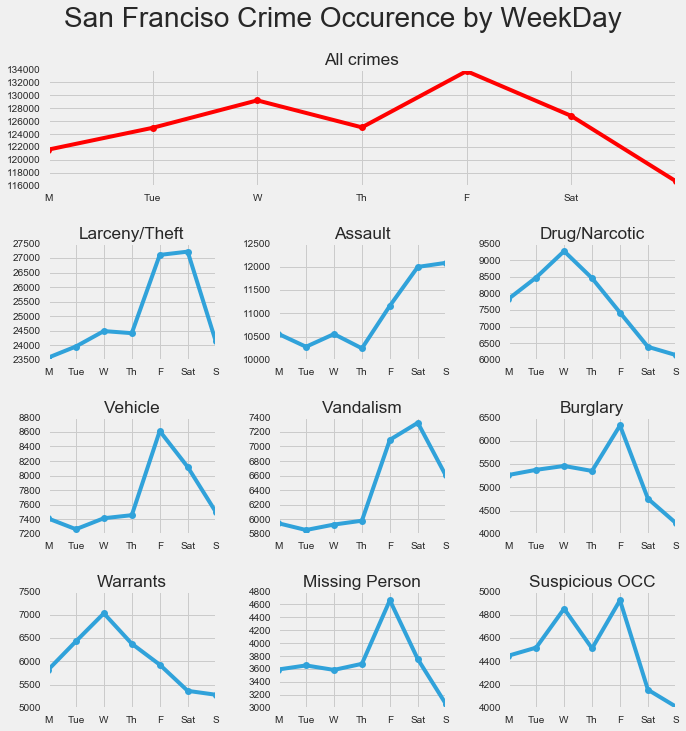

In [30]:
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
daysOfWeekLit = ['M', 'Tue', 'W', 'Th', 'F', 'Sat', 'S']
with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((4,3), (0,0), colspan=3)
    ax1.plot(train.groupby('WeekDay').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    ax1.set_xticklabels(daysOfWeekLit)
    
    ax2 = plt.subplot2grid((4,3), (1, 0))
    ax2.plot(train.loc[train["Category"]=='LARCENY/THEFT'].groupby('WeekDay').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    ax2.set_xticklabels(daysOfWeekLit)
    
    ax3 = plt.subplot2grid((4,3), (1, 1))
    ax3.plot(train.loc[train["Category"]=='ASSAULT'].groupby('WeekDay').size(), 'o-')
    ax3.set_title ('Assault')
    ax3.set_xticklabels(daysOfWeekLit)
    
    ax4 = plt.subplot2grid((4,3), (1, 2))
    ax4.plot(train.loc[train["Category"]=='DRUG/NARCOTIC'].groupby('WeekDay').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    ax4.set_xticklabels(daysOfWeekLit)
    
    ax5 = plt.subplot2grid((4,3), (2, 0))
    ax5.plot(train.loc[train["Category"]=='VEHICLE THEFT'].groupby('WeekDay').size(), 'o-')
    ax5.set_title ('Vehicle')
    ax5.set_xticklabels(daysOfWeekLit)
    
    ax6 = plt.subplot2grid((4,3), (2, 1))
    ax6.plot(train.loc[train["Category"]=='VANDALISM'].groupby('WeekDay').size(), 'o-')
    ax6.set_title ('Vandalism')
    ax6.set_xticklabels(daysOfWeekLit)
    
    ax7 = plt.subplot2grid((4,3), (2, 2))
    ax7.plot(train.loc[train["Category"]=='BURGLARY'].groupby('WeekDay').size(), 'o-')
    ax7.set_title ('Burglary')
    ax7.set_xticklabels(daysOfWeekLit)
    
    ax8 = plt.subplot2grid((4,3), (3, 0))
    ax8.plot(train.loc[train["Category"]=='WARRANTS'].groupby('WeekDay').size(), 'o-')
    ax8.set_title ('Warrants')
    ax8.set_xticklabels(daysOfWeekLit)
    
    ax9 = plt.subplot2grid((4,3), (3, 1))
    ax9.plot(train.loc[train["Category"]=='MISSING PERSON'].groupby('WeekDay').size(), 'o-')
    ax9.set_title ('Missing Person')
    ax9.set_xticklabels(daysOfWeekLit)
    
    ax10 = plt.subplot2grid((4,3), (3, 2))
    ax10.plot(train.loc[train["Category"]=='SUSPICIOUS OCC'].groupby('WeekDay').size(), 'o-')
    ax10.set_title ('Suspicious OCC')
    ax10.set_xticklabels(daysOfWeekLit)
    
    
    
    
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by WeekDay',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()

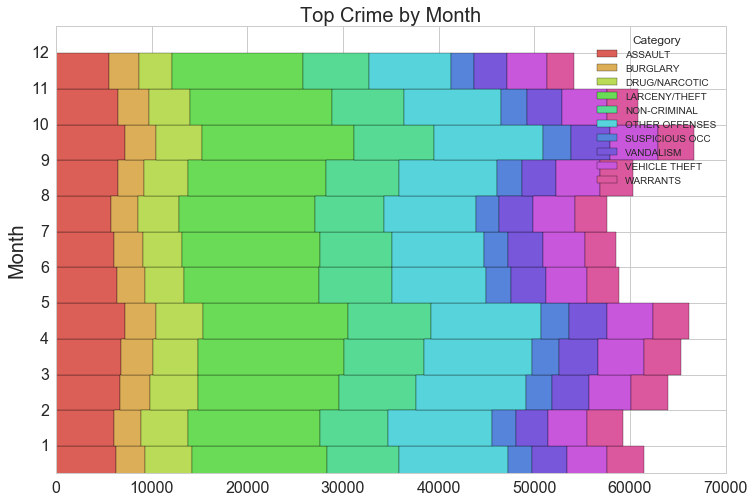

In [31]:
month_category = train.loc[train["Category"].isin(top_10_crime)].groupby(['Month','Category']).size().unstack()
plot_bar(month_category,"Top Crime by Month","Month")

In [36]:
from sklearn import preprocessing,linear_model,cross_validation 

In [30]:
category_encoded = preprocessing.LabelEncoder()
category_encoded.fit(train["Category"])
train["category_encoded"] = category_encoded.transform(train["Category"])


In [35]:
address_encoded = preprocessing.LabelEncoder()
address_encoded.fit(list(train["Address"])+list(test["Address"]))
train["address_encoded"] = address_encoded.transform(train["Address"])
test["address_encoded"] = address_encoded.transform(test["Address"])

Learning with Counts,
referene: https://msdn.microsoft.com/en-us/library/azure/dn913056.aspx
https://www.kaggle.com/c/sf-crime/forums/t/15836/predicting-crime-categories-with-address-featurization-and-neural-nets
log odds of (# address A have Crime C/ # of address A) 

In [36]:
addresses=sorted(train["address_encoded"].unique())
categories=sorted(train["category_encoded"].unique())
C_counts=train.groupby(["category_encoded"]).size()
A_C_counts=train.groupby(["address_encoded","category_encoded"]).size()
A_counts=train.groupby(["address_encoded"]).size()

In [37]:

logodds={}
logoddsPA={}
MIN_CAT_COUNTS=2
row = float(len(train))
default_logodds=np.log(C_counts/row)-np.log(1.0-C_counts/row)
for addr in addresses:
    PA = A_counts[addr]/row
    logoddsPA[addr] = np.log(PA) - np.log(1.-PA)
    logodds[addr] = deepcopy(default_logodds)
    for cat in A_C_counts[addr].keys():
        if A_C_counts[addr][cat]> MIN_CAT_COUNTS and A_C_counts[addr][cat]<A_counts[addr]:
            P_A_C = A_C_counts[addr][cat]/float(A_counts[addr])
            logodds[addr][cat] = np.log(P_A_C) - np.log(1.0 - P_A_C)
        logodds[addr] = pd.Series(logodds[addr],index = categories )
            
            
    

In [38]:
def address_feature(df,logodds,logoddsPA,categories):
    df["logoddsPA"] = df["address_encoded"].apply(lambda x: logoddsPA[x])
    logoddsPAC = df["address_encoded"].apply(lambda x: logodds[x])
    df["Intersection"] = df["Address"].apply(lambda x: 1 if "/" in x else 0)
    logoddsPAC.columns = ["logodds" + str(cat) for cat in categories]
    df = df.join(logoddsPAC.ix[:,:])
    address_feature =["Intersection","logoddsPA"]
    address_feature.extend(logoddsPAC.columns)
    # print df.head()
    return address_feature,df
train_address_feature,train = address_feature(train,logodds,logoddsPA,categories)    

In [39]:
categorical_feature = ["PdDistrict","Month","DayOfWeek"]
def categorical_feature_preprocess(categorical_feature,dataset):
    list_categorical = []
    for col in categorical_feature:
        dummy = pd.get_dummies(dataset[col])
        list_categorical.append(dummy)
    dataset_categorical = pd.concat(list_categorical,axis=1)
    return dataset_categorical

train_categorical = categorical_feature_preprocess(categorical_feature,train)

In [40]:
test_categorical = categorical_feature_preprocess(categorical_feature,test)

In [41]:
train_categorical.head()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,...,10,11,12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
#Update the odds of address for the test data
new_addresses=sorted(test["address_encoded"].unique())
new_A_counts = test.groupby("address_encoded").size()
only_new=set(new_addresses+addresses)-set(addresses)
only_old=set(new_addresses+addresses)-set(new_addresses)
in_both=set(new_addresses).intersection(addresses)
for addr in only_new:
    PA = new_A_counts[addr]/float(len(test)+len(train))
    logoddsPA[addr] = np.log(PA) - np.log(1. - PA)
    logodds[addr] = deepcopy(default_logodds)
    logodds[addr].index=range(len(categories))
for addr in in_both:
    PA = (new_A_counts[addr] + A_counts[addr])/float(len(test)+len(train))
    logoddsPA[addr] = np.log(PA) - np.log(1. - PA)
test_address_feature,test = address_feature(test,logodds,logoddsPA,categories)


In [43]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,DateIndex,Year,Month,...,logodds29,logodds30,logodds31,logodds32,logodds33,logodds34,logodds35,logodds36,logodds37,logodds38
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015-05-10 23:59:00,2015,5,...,-8.688077,-5.259591,-7.454398,-2.772589,-11.893691,-4.777894,-2.533697,-2.335375,-2.533697,-4.621396
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015-05-10 23:51:00,2015,5,...,-8.688077,-5.259591,-7.454398,-3.332205,-11.893691,-4.777894,-2.924890,-2.682075,-2.159484,-4.199705
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015-05-10 23:50:00,2015,5,...,-8.688077,-5.259591,-7.454398,-3.294016,-11.893691,-4.777894,-2.924890,-1.223775,-2.985679,-4.621396
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015-05-10 23:45:00,2015,5,...,-8.688077,-5.259591,-7.454398,-2.888233,-11.893691,-5.095793,-2.373798,-4.240298,-2.929592,-3.608837
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015-05-10 23:45:00,2015,5,...,-8.688077,-5.259591,-7.454398,-2.888233,-11.893691,-5.095793,-2.373798,-4.240298,-2.929592,-3.608837


In [44]:
continuous_feature = ["Year","Hour","X","Y"] + train_address_feature[1:]
def numerical_feature_preprocess(continuous_feature,train,test):
    scaler = StandardScaler()
    for col in continuous_feature:
        scaler.fit(train[col])
        train[col] = scaler.transform(train[col].reshape(-1, 1))
        test[col] = scaler.transform(test[col].reshape(-1, 1))
numerical_feature_preprocess(continuous_feature,train,test)  

/Users/ChiYuan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ChiYuan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ChiYuan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ChiYuan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by Standard

In [45]:
train.describe()

,X,Y,Year,Month,WeekDay,Hour,category_encoded,address_encoded,logoddsPA,Intersection,...,logodds29,logodds30,logodds31,logodds32,logodds33,logodds34,logodds35,logodds36,logodds37,logodds38
count,8.780490e+05,8.780490e+05,8.780490e+05,878049.000000,878049.000000,8.780490e+05,878049.000000,878049.000000,8.780490e+05,878049.000000,...,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,878049,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05
mean,9.286136e-13,-1.684942e-13,-1.228077e-12,6.436509,2.992691,-1.291517e-15,19.338687,9868.953859,1.072380e-14,0.297043,...,4.154155e-14,3.582740e-14,-1.963487e-15,-1.093422e-14,1,3.307111e-14,1.875602e-14,-7.472837e-14,8.971692e-14,1.181369e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,3.428972,1.972023,1.000001e+00,10.688637,6390.592352,1.000001e+00,0.456956,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.594341e+00,-2.448134e+00,-1.573050e+00,1.000000,0.000000,-2.047868e+00,0.000000,0.000000,-2.708098e+00,0.000000,...,-1.844858e-01,-2.592266e+00,-1.188302e-01,-4.905560e+00,1,-2.252454e+00,-3.318684e+00,-3.002182e+00,-6.518942e+00,-3.772344e+00
25%,-4.029381e-01,-6.045467e-01,-7.468748e-01,3.000000,1.000000,-6.737321e-01,16.000000,4453.000000,-6.956086e-01,0.000000,...,-1.844858e-01,-1.892870e-01,-1.188302e-01,-1.870183e-01,1,-3.226887e-01,-4.168791e-01,-5.618526e-01,-2.419022e-01,-1.944158e-01
50%,2.508377e-01,3.470083e-01,7.930022e-02,6.000000,3.000000,8.967695e-02,20.000000,9401.000000,-8.713532e-02,0.000000,...,-1.844858e-01,-1.892870e-01,-1.188302e-01,-5.099232e-02,1,-3.226887e-01,1.723256e-01,3.319063e-01,-2.419022e-01,-1.944158e-01
75%,6.251127e-01,7.172702e-01,9.054753e-01,9.000000,5.000000,8.530860e-01,25.000000,13061.000000,6.160068e-01,1.000000,...,-1.844858e-01,-1.892870e-01,-1.188302e-01,3.750967e-01,1,-3.226887e-01,3.817376e-01,3.639354e-01,5.319030e-01,-1.944158e-01
max,2.287099e+00,2.190862e+00,1.731650e+00,12.000000,6.000000,1.463813e+00,38.000000,24776.000000,2.828622e+00,1.000000,...,8.386692e+00,1.186460e+01,3.308691e+01,8.341811e+00,1,1.005059e+01,6.223359e+00,4.448546e+00,7.504461e+00,9.772443e+00


In [130]:
# test["PdDistrict_encoded"] = pd_district_encoded.transform(test["PdDistrict"])


In [46]:
train_data = pd.concat([train[continuous_feature + ["Intersection"]],train_categorical],axis=1)

train_data.head()


,Year,Hour,X,Y,logoddsPA,logodds0,logodds1,logodds2,logodds3,logodds4,...,10,11,12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.73165,1.463813,-0.123710,0.312986,-0.645158,-0.065564,-0.076277,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,0,0,0,1
1,1.73165,1.463813,-0.123710,0.312986,-0.645158,-0.065564,-0.076277,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,0,0,0,1
2,1.73165,1.463813,-0.063250,1.381343,-1.008893,-0.065564,-0.076277,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,0,0,0,1
3,1.73165,1.463813,-0.167361,1.400310,0.025138,-0.065564,-1.096232,-0.087611,-0.157649,1.524265,...,0,0,0,0,0,0,0,0,0,1
4,1.73165,1.463813,-0.631782,0.186458,-0.566802,-0.065564,-0.076277,-0.087611,-0.157649,2.256390,...,0,0,0,0,0,0,0,0,0,1


In [47]:
test_data = pd.concat([test[continuous_feature+ ["Intersection"]],test_categorical],axis=1)
test_data.head()

,Year,Hour,X,Y,logoddsPA,logodds0,logodds1,logodds2,logodds3,logodds4,...,10,11,12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.73165,1.463813,0.916643,-1.323649,-0.435417,-0.065564,0.515400,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,1,0,0,0
1,1.73165,1.463813,1.235615,-1.432019,0.162736,-0.065564,0.348945,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,1,0,0,0
2,1.73165,1.463813,-0.128072,1.041917,-1.060107,-0.065564,-0.076277,-0.087611,-0.157649,2.546570,...,0,0,0,0,0,0,1,0,0,0
3,1.73165,1.463813,-0.578640,-1.888083,0.626303,-0.065564,1.700197,-0.087611,-0.157649,-0.267456,...,0,0,0,0,0,0,1,0,0,0
4,1.73165,1.463813,-0.578640,-1.888083,0.626303,-0.065564,1.700197,-0.087611,-0.157649,-0.267456,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#lg_train = linear_model.LogisticRegression(C = 0.1,class_weight ='balanced',solver = 'lbfgs', multi_class = 'multinomial')
lg_train = linear_model.LogisticRegression()


In [53]:
scores = cross_validation.cross_val_score(lg_train,train_data,train['category_encoded'],cv=5,scoring='log_loss')

In [49]:
lg_train.fit(train_data,train['category_encoded'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
print scores

[-2.42575835 -2.32725439 -2.28459434 -2.29676936 -2.39757172]


In [51]:
log_loss(train["category_encoded"],np.array(lg_train.predict_proba(train_data)))

2.3048925549754671

In [50]:
np.mean((train["category_encoded"]==lg_train.predict(train_data)))

0.30736325649251922

In [219]:
lg_predict = lg_train.predict_proba(test_data)
lg_result = pd.DataFrame(lg_predict,columns =category_encoded.classes_)
lg_result.head()
lg_result.to_csv("logistic.csv",index=True,index_label ='Id' )



In [220]:
# print lg_result[:100]


       ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0.002637  0.111350    0.000032  0.001130  0.030572            0.000981   
1   0.002872  0.113994    0.000033  0.001205  0.030467            0.001020   
2   0.000820  0.077412    0.000041  0.000320  0.036981            0.001653   
3   0.001336  0.106417    0.000033  0.001164  0.028820            0.000837   
4   0.001336  0.106417    0.000033  0.001164  0.028820            0.000837   
5   0.001419  0.086125    0.000048  0.000563  0.034551            0.001050   
6   0.001415  0.113873    0.000036  0.001258  0.029729            0.000915   
7   0.001609  0.119705    0.000039  0.001397  0.029951            0.000986   
8   0.000743  0.096365    0.000033  0.001033  0.021790            0.003743   
9   0.000704  0.076067    0.000061  0.000254  0.034395            0.002116   
10  0.001633  0.122449    0.000040  0.001432  0.030263            0.001016   
11  0.000813  0.098718    0.000034  0.001103  0.021748          

In [52]:
with open('logistic.pkl','wb') as s:
        pickle.dump(lg_train,s)

In [28]:
"""
with open('logistic04102016.pkl', 'rb') as f:
    logistic = pickle.load(f)
train_data = pd.read_csv("train_data_fe.csv") #train_data is saved separately
test_data = pd.read_csv("test_data_fe.csv")
coef_log = pd.DataFrame(logistic.coef_ ,index = category_encoded.classes_, columns = train_data.columns[1:])
coef_log.to_csv("logistics_coefficient.csv")
del test_data['Unnamed: 0']
lg_predict = logistic.predict_proba(test_data)
lg_result = pd.DataFrame(lg_predict,columns =category_encoded.classes_)
lg_result.head()
lg_result.to_csv("logistic.csv",index=True,index_label ='Id' )
"""

In [38]:
test_data.head()

,Year,Hour,X,Y,logoddsPA,logodds0,logodds1,logodds2,logodds3,logodds4,...,10,11,12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.73165,1.463813,0.916643,-1.323649,-0.435417,-0.065564,0.515400,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,1,0,0,0
1,1.73165,1.463813,1.235615,-1.432019,0.162736,-0.065564,0.348945,-0.087611,-0.157649,-0.072074,...,0,0,0,0,0,0,1,0,0,0
2,1.73165,1.463813,-0.128072,1.041917,-1.060107,-0.065564,-0.076277,-0.087611,-0.157649,2.546570,...,0,0,0,0,0,0,1,0,0,0
3,1.73165,1.463813,-0.578640,-1.888083,0.626303,-0.065564,1.700197,-0.087611,-0.157649,-0.267456,...,0,0,0,0,0,0,1,0,0,0
4,1.73165,1.463813,-0.578640,-1.888083,0.626303,-0.065564,1.700197,-0.087611,-0.157649,-0.267456,...,0,0,0,0,0,0,1,0,0,0


In [34]:
train_data.head()

,Unnamed: 0,Year,Hour,X,Y,logoddsPA,logodds0,logodds1,logodds2,logodds3,...,10,11,12,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1.73165,1.463813,-0.123710,0.312986,-0.645158,-0.065564,-0.076277,-0.087611,-0.157649,...,0,0,0,0,0,0,0,0,0,1
1,1,1.73165,1.463813,-0.123710,0.312986,-0.645158,-0.065564,-0.076277,-0.087611,-0.157649,...,0,0,0,0,0,0,0,0,0,1
2,2,1.73165,1.463813,-0.063250,1.381343,-1.008893,-0.065564,-0.076277,-0.087611,-0.157649,...,0,0,0,0,0,0,0,0,0,1
3,3,1.73165,1.463813,-0.167361,1.400310,0.025138,-0.065564,-1.096232,-0.087611,-0.157649,...,0,0,0,0,0,0,0,0,0,1
4,4,1.73165,1.463813,-0.631782,0.186458,-0.566802,-0.065564,-0.076277,-0.087611,-0.157649,...,0,0,0,0,0,0,0,0,0,1
